## Data Collection and Preprocessing

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('../assets/datas/BrentOilPrices.csv')

def parse_dates(date):
    for fmt in ('%d-%b-%y', '%b %d, %Y'):
        try:
            return pd.to_datetime(date, format=fmt)
        except ValueError:
            pass
    raise ValueError(f"Date format not recognized: {date}")

# Apply the custom date parser
data['Date'] = data['Date'].apply(parse_dates)


# Handle missing values
data = data.dropna()

# Normalize prices if necessary
data['Price'] = (data['Price'] - data['Price'].mean()) / data['Price'].std()

## Exploratory Data Analysis (EDA)

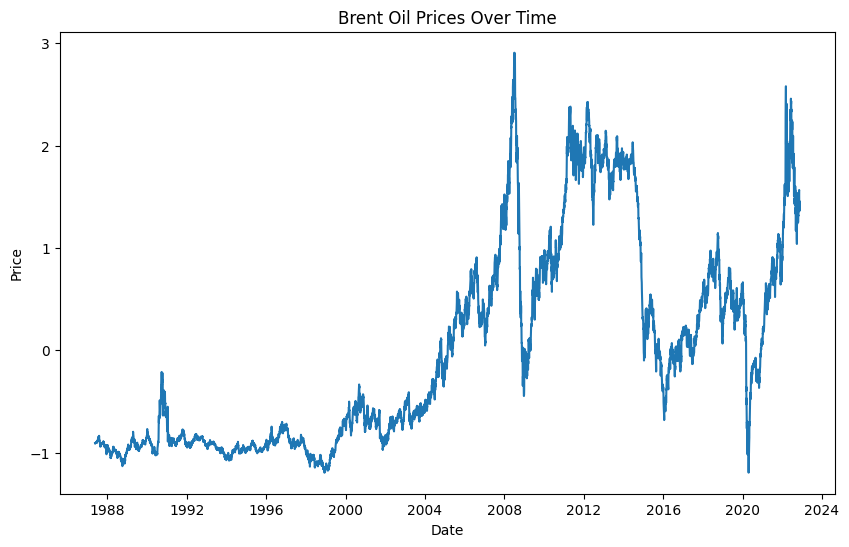

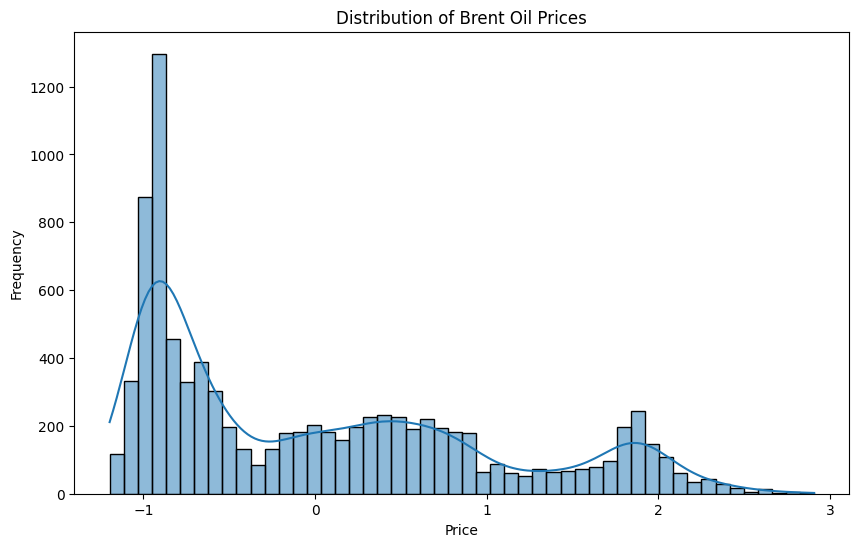

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot time series graph
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'])
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=50, kde=True)
plt.title('Distribution of Brent Oil Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Model Selection and Training


In [4]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(data['Price'], order=(5, 1, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(5, 1, 0)   Log Likelihood               16924.645
Date:                Fri, 21 Feb 2025   AIC                         -33837.290
Time:                        20:52:00   BIC                         -33794.653
Sample:                             0   HQIC                        -33822.782
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0260      0.006      4.345      0.000       0.014       0.038
ar.L2         -0.0235      0.006     -4.233      0.000      -0.034      -0.013
ar.L3         -0.0072      0.005     -1.509      0.1

## Change Point Detection


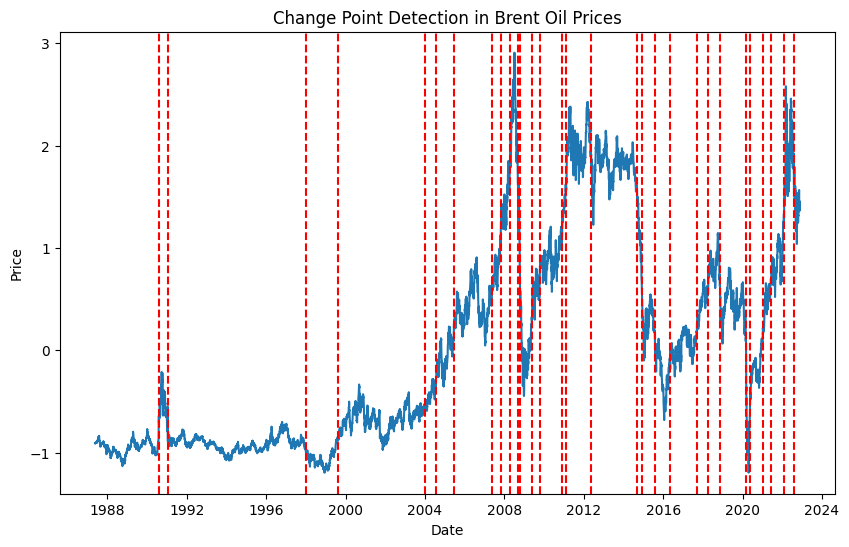

In [6]:
from ruptures import Pelt, Binseg

algo = Pelt(model="rbf").fit(data['Price'].values)
result = algo.predict(pen=10)

# Filter out out-of-bounds change points
result = [cp for cp in result if cp < len(data)]

# Plot change points
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'])
for cp in result:
    plt.axvline(data['Date'].iloc[cp], color='r', linestyle='--')
plt.title('Change Point Detection in Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()